# Reference

[Plotting with plotline, part 2](https://www.practicaldatascience.org/html/plotting_part2.html)

In [ ]:
!pip install plotnine==0.8.0

In [1]:
import pandas as pd
from plotnine import *

gapminder = pd.read_csv("https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv")
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


# Scales

In [2]:
gapminder_2007 = gapminder.query("year == 2007")

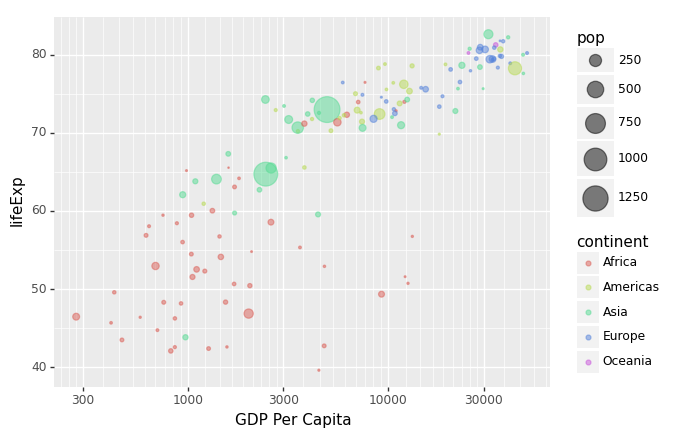

<ggplot: (8730382323857)>

In [8]:
(
    ggplot(gapminder_2007, aes(x="gdpPercap", y="lifeExp", color="continent", size="pop")) 
    # add scatter points
    + geom_point(alpha=0.5)
    # log-scale the x-axis
    + scale_x_log10(name="GDP Per Capita")
    # change the size scale
    + scale_size(range  = [0.1, 10],
                 breaks = [250000000, 500000000, 750000000, 1000000000, 1250000000],
                 labels = ["250", "500", "750", "1000", "1250"])
)

# Changing Labels

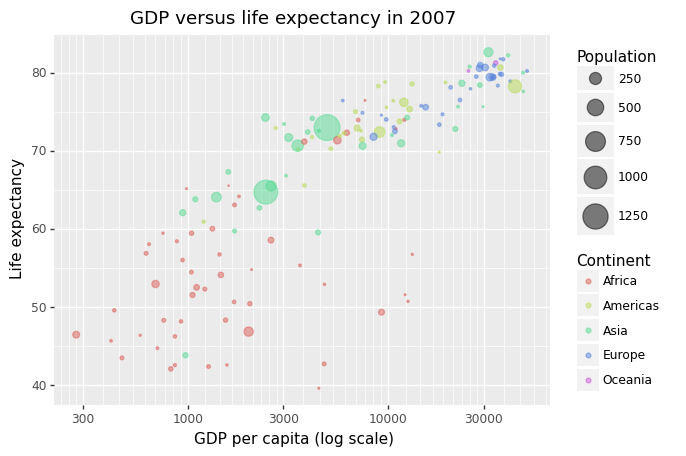

<ggplot: (8730382199265)>

In [16]:
(
    ggplot(gapminder_2007, aes(x="gdpPercap", y="lifeExp", color="continent", size="pop")) 
    # add scatter points
    + geom_point(alpha=0.5)
    # log-scale the x-axis
    + scale_x_log10()
    # change the size scale
    + scale_size(range = [0.1, 10],
                 breaks = [250000000, 500000000, 750000000, 1000000000, 1250000000],
                 labels = ["250", "500", "750", "1000", "1250"])
    # change labels
    + labs(title="GDP versus life expectancy in 2007",
           x="GDP per capita (log scale)",
           y="Life expectancy",
           size="Population",
           color="Continent")
)

# Faceting

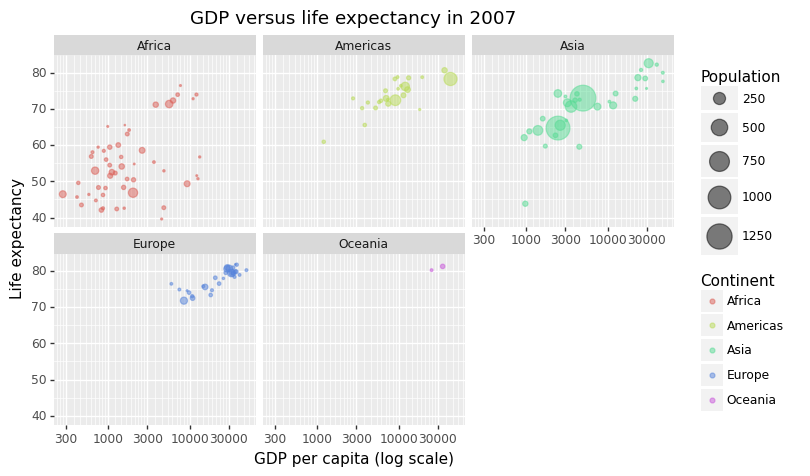

<ggplot: (8730372634593)>

In [20]:
import plotnine
plotnine.options.figure_size = (8, 4.8)

(
    ggplot(gapminder_2007, aes(x="gdpPercap", y="lifeExp", color="continent", size="pop")) 
    # add scatter points
    + geom_point(alpha=0.5)
    # log-scale the x-axis
    + scale_x_log10()
    # change the size scale
    + scale_size(range = [0.1, 10],
                 breaks = [250000000, 500000000, 750000000, 1000000000, 1250000000],
                 labels = ["250", "500", "750", "1000", "1250"])
    # change labels
    + labs(title="GDP versus life expectancy in 2007",
           x="GDP per capita (log scale)",
           y="Life expectancy",
           size="Population",
           color="Continent")
    # faceting
    + facet_wrap("continent")
)

# Themes

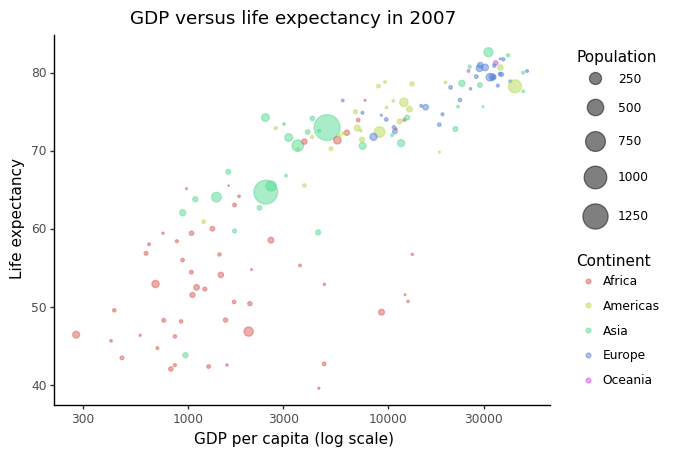

<ggplot: (8730381908677)>

In [25]:
plotnine.options.figure_size = (6.4, 4.8)

(
    ggplot(gapminder_2007, aes(x="gdpPercap", y="lifeExp", color="continent", size="pop")) 
    # add scatter points
    + geom_point(alpha=0.5)
    # log-scale the x-axis
    + scale_x_log10()
    # change the size scale
    + scale_size(range = [0.1, 10],
                 breaks = [250000000, 500000000, 750000000, 1000000000, 1250000000],
                 labels = ["250", "500", "750", "1000", "1250"])
    # change labels
    + labs(title="GDP versus life expectancy in 2007",
           x="GDP per capita (log scale)",
           y="Life expectancy",
           size="Population",
           color="Continent")
    # add a nicer theme
    + theme_classic(base_family="Helvetica")
)

As an example of further customization of the ggplot theme, below we do the following:

- grey the axes lines (set `axis.line = element_blank()` in `theme()`)
- add some text annotations (add `geom_text` layer)

In [33]:
gapminder_2007.query("pop > 1000000000 | country == 'Nigeria' | country == 'United States'")

,country,year,pop,continent,lifeExp,gdpPercap
299,China,2007,1.318683e+09,Asia,72.961,4959.114854
707,India,2007,1.110396e+09,Asia,64.698,2452.210407
1139,Nigeria,2007,1.350312e+08,Africa,46.859,2013.977305
1619,United States,2007,3.011399e+08,Americas,78.242,42951.653090


/usr/local/lib/python3.7/dist-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'size' is already present.
Adding another scale for 'size',
which will replace the existing scale.



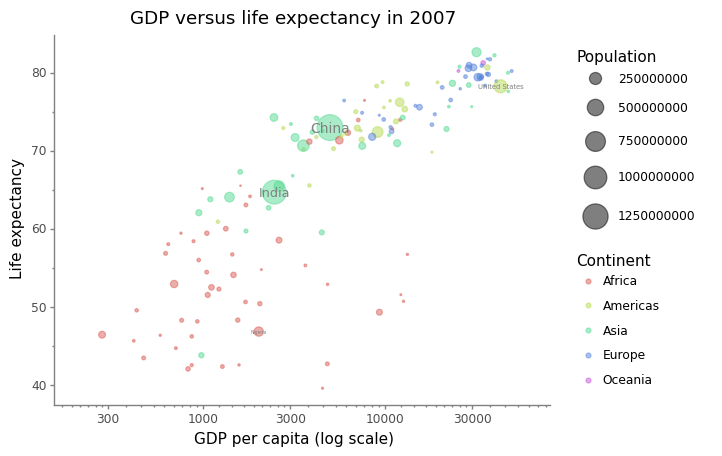

<ggplot: (8730371939965)>

In [37]:
(
    ggplot(gapminder_2007, aes(x="gdpPercap", y="lifeExp", color="continent", size="pop")) 
    # add scatter points
    + geom_point(alpha=0.5)
    # add some text annotations for the very large countries
    + geom_text(aes(x="gdpPercap", y="lifeExp", label="country"),
                color="grey",
                data=gapminder_2007.query("pop > 1000000000 | country == 'Nigeria' | country == 'United States'"))
    # log-scale the x-axis
    + scale_x_log10(limits = [200, 60000])
    # change the size scale
    + scale_size(range = [0.1, 10],
                 breaks = [250000000, 500000000, 750000000, 1000000000, 1250000000],
                 labels = ["250", "500", "750", "1000", "1250"])
    # change labels
    + labs(title="GDP versus life expectancy in 2007",
           x="GDP per capita (log scale)",
           y="Life expectancy",
           size="Population",
           color="Continent")
    # change the size scale
    + scale_size(range = [0.1, 10])
    # add a nicer theme
    + theme_classic(base_family="Helvetica")
    # place legend at top and grey axis lines
    + theme(axis_line=element_line(color="grey"),
            axis_ticks=element_line(color="grey"))
)